# Mean Squared Error

*Teaching Machines the Art of Regret*

> “To err is human.
> To minimize that error — that’s machine learning.” 🤖

---

## 🎯 What Is MSE?

Imagine your ML model as a junior analyst making predictions about sales.
Every time it’s wrong, you slap it with a gentle *mathematical frown* 😠 — that’s the **error**.

Now, instead of yelling at it for each mistake, you:

1. Measure how far off it was (difference between prediction & truth),
2. Square it (because negative errors also hurt),
3. Average them all.

That’s **Mean Squared Error (MSE)** — the *average squared disappointment* of your model.

[
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
]

Where:

* ( y_i ) = actual value
* ( \hat{y_i} ) = predicted value
* ( n ) = number of observations

---

## 🧮 Example: Predicting Sales

| Observation | Actual (y) | Predicted (ŷ) | Error (y−ŷ) | Squared Error |
| ----------- | ---------- | ------------- | ----------- | ------------- |
| 1           | 100        | 110           | -10         | 100           |
| 2           | 200        | 190           | 10          | 100           |
| 3           | 300        | 270           | 30          | 900           |

[
\text{MSE} = \frac{100 + 100 + 900}{3} = 366.67
]

> 💬 “On average, the model is about 19 units off — but because errors are squared, big mistakes really sting.” 🥲

---

## 📊 Why Square the Errors?

Because **math loves drama.**
Squaring does two things:

1. **Eliminates negatives** (so overestimates and underestimates don’t cancel out),
2. **Punishes big errors** — the way your boss remembers *that one* bad forecast from last year.

---

## 💼 Business Analogy

Let’s say you’re a **coffee chain manager** predicting daily sales.

* Predicting 480 cups when you sell 500 → okay, close enough. ☕
* Predicting 50 cups when you sell 500 → catastrophic caffeine shortage! 😱

Squaring ensures the *big* misses matter *a lot more*.

That’s why MSE = *“Measure of how badly your model can mess up, weighted by embarrassment.”*

---

## ⚙️ In Python

```python
from sklearn.metrics import mean_squared_error

y_true = [100, 200, 300]
y_pred = [110, 190, 270]

mse = mean_squared_error(y_true, y_pred)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {mse**0.5:.2f}")  # Root Mean Squared Error
```

Output:

```
MSE: 366.67
RMSE: 19.15
```

> 💡 **RMSE** (Root Mean Squared Error) brings the units back — so it’s easier to explain in meetings.
> “Our model’s off by about **19 sales** per day on average.” 📉

---

## 📈 Visual Intuition

```python
import matplotlib.pyplot as plt
import numpy as np

y_actual = np.array([100, 200, 300])
y_pred = np.array([110, 190, 270])

plt.scatter(y_actual, y_pred, color='blue', label='Predictions')
plt.plot([0, 300], [0, 300], color='red', linestyle='--', label='Perfect Prediction Line')
for i in range(len(y_actual)):
    plt.plot([y_actual[i], y_actual[i]], [y_actual[i], y_pred[i]], 'gray', linestyle=':')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Error Distances (MSE Visualization)')
plt.legend()
plt.show()
```

> Each gray line = a “mistake.”
> The longer the line, the bigger the pain (and the bigger the MSE). 💔

---

## 🧠 When to Use MSE

| Metric                        | Best For               | Notes                                 |
| ----------------------------- | ---------------------- | ------------------------------------- |
| **MSE**                       | Continuous outcomes    | Penalizes large errors heavily        |
| **RMSE**                      | Interpretability       | Easier to explain (in original units) |
| **MAE (Mean Absolute Error)** | When you want fairness | Doesn’t punish big errors as much     |

💬 **Pro tip:**
If your business hates big mistakes (like loan defaults or stock forecasts), go with **MSE/RMSE**.
If you want to treat all errors equally, use **MAE**.

---

## 🤹 Practice Corner: “Forecast Like a Boss”

Try this small challenge 👇

You’re predicting next month’s **sales revenue** for 4 stores:

| Store | Actual ($) | Predicted ($) |
| ----- | ---------- | ------------- |
| A     | 50,000     | 48,000        |
| B     | 75,000     | 80,000        |
| C     | 60,000     | 65,000        |
| D     | 90,000     | 100,000       |

1. Compute **MSE** and **RMSE**.
2. Which store has the largest squared error?
3. In business terms — what does this tell you?

💡 **Hint:** One bad forecast can ruin your bonus report 😅

---

## 🧩 Common Pitfalls

| Mistake                                          | Explanation                               |
| ------------------------------------------------ | ----------------------------------------- |
| Ignoring scale                                   | MSE grows with the magnitude of your data |
| Comparing MSE across models with different units | Don’t — use RMSE or relative metrics      |
| Forgetting to check residual plots               | MSE alone can’t tell if errors are biased |

---

## 🧭 Recap

| Concept  | Meaning                                    |
| -------- | ------------------------------------------ |
| MSE      | Average squared prediction error           |
| RMSE     | Square root of MSE (in same units as data) |
| Goal     | Make it as small as possible               |
| Punishes | Large errors more heavily                  |
| Used in  | Regression, forecasting, optimization      |

---

## 💬 Final Thought

> “MSE is like guilt — it teaches your model to reflect on its mistakes, but too much of it and nobody learns anything.” 😅

---

## 🔜 Next Up

👉 Head to **[Gradients & Partial Derivatives](gradients)** —
where your model learns *how to apologize properly* by adjusting itself step by step. 🧘‍♂️

> “Because knowing you’re wrong is one thing — learning from it is where the magic happens.” 🌟

---

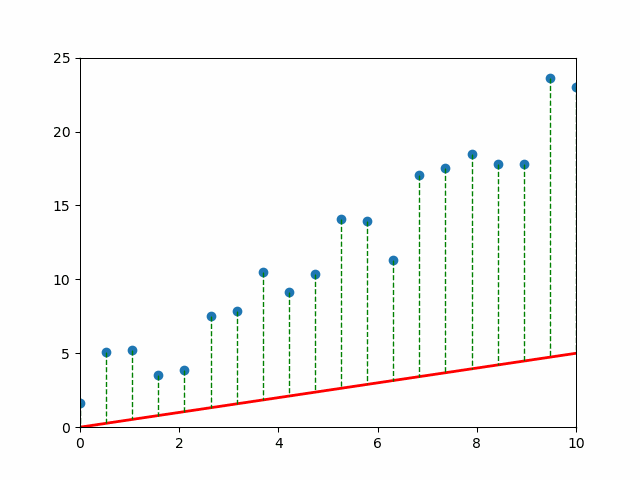

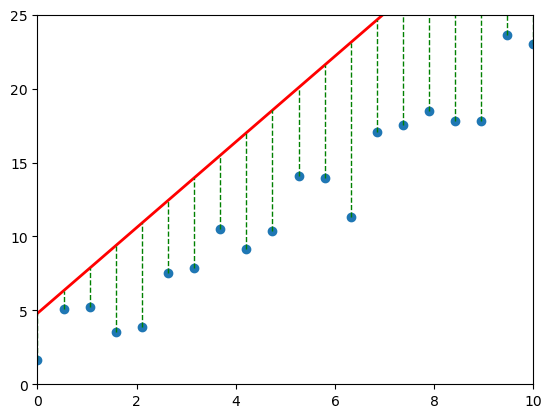

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter

# Define the true function
def true_function(x):
    return 2 * x + 1

# Generate some data points
x_data = np.linspace(0, 10, 20)
y_data = true_function(x_data) + np.random.normal(0, 2, 20)

# Define the figure and axes
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 25)

# Plot the data points
scatter = ax.scatter(x_data, y_data)

# Create an empty line object for the predicted line
line, = ax.plot([], [], 'r-', lw=2)

# Create empty line objects for the error lines
error_lines = []
for _ in range(len(x_data)):
    err_line, = ax.plot([], [], 'g--', lw=1)
    error_lines.append(err_line)

# Function to initialize the animation
def init():
    line.set_data([], [])
    for err_line in error_lines:
        err_line.set_data([], [])
    return (line, *error_lines)

# Function to update the animation frame
def animate(i):
    # Define the predicted function with varying slope and intercept
    def predicted_function(x, slope, intercept):
        return slope * x + intercept

    # Define slope and intercept for the current frame
    slope = 0.5 + i * 0.1
    intercept = 0 + i * 0.2

    # Calculate predicted y values
    y_predicted = predicted_function(x_data, slope, intercept)

    # Update the line data
    line.set_data(x_data, y_predicted)

    # Update error lines
    for j, err_line in enumerate(error_lines):
        err_line.set_data([x_data[j], x_data[j]], [y_data[j], y_predicted[j]])

    return (line, *error_lines)

# Create the animation
ani = FuncAnimation(fig, animate, frames=np.arange(25), init_func=init, interval=1000, blit=True)

# 10. Save as GIF
ani.save('squared_error.gif', writer=PillowWriter(fps=10))

# 11. Display saved GIF inside notebook
from IPython.display import Image
Image(filename="squared_error.gif")

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/02_least_squares.png" alt="ml" style="margin: 0 auto; width: 750px;"/>


# An Objective: Mean Squared Error

We pick $\theta$ to minimize the mean squared error (MSE). Slight variants of this objective are also known as the residual sum of squares (RSS) or the sum of squared residuals (SSR).
$$J(\theta)= \frac{1}{2n} \sum_{i=1}^n(y^{(i)}-\theta^\top x^{(i)})^2$$
In other words, we are looking for the best compromise in $\theta$ over all the data points.

















# Mean Squared Error: Partial Derivatives

Let's work out the derivatives for $\frac{1}{2} \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2,$ the MSE of a linear model $f_\theta$ for one training example $(x^{(i)}, y^{(i)})$, which we denote $J^{(i)}(\theta)$.

\begin{align*}
\frac{\partial}{\partial \theta_j} J^{(i)}(\theta) & = \frac{\partial}{\partial \theta_j} \left(\frac{1}{2} \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2\right) \\
& = \left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot \frac{\partial}{\partial \theta_j} \left( f_\theta(x^{(i)}) - y^{(i)} \right) \\
& = \left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot \frac{\partial}{\partial \theta_j} \left( \sum_{k=0}^d \theta_k \cdot x^{(i)}_k - y^{(i)} \right) \\
& = \left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}_j
\end{align*}

# Mean Squared Error: The Gradient

We can use this derivation to obtain an expression for the gradient of the MSE for a linear model

\begin{align*}
\small
{\tiny \nabla_\theta J^{(i)} (\theta)} = \begin{bmatrix}
\frac{\partial J^{(i)}(\theta)}{\partial \theta_0} \\
\frac{\partial J^{(i)}(\theta)}{\partial \theta_1} \\
\vdots \\
\frac{\partial J^{(i)}(\theta)}{\partial \theta_d}
\end{bmatrix}
=
\begin{bmatrix}
\left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}_0 \\
\left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}_1 \\
\vdots \\
\left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}_d
\end{bmatrix}
=
\left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}
\end{align*}

Note that the MSE over the entire dataset is $J(\theta) = \frac{1}{n}\sum_{i=1}^n J^{(i)}(\theta)$. Therefore:

\begin{align*}
\nabla_\theta J (\theta) = \begin{bmatrix}
\frac{\partial J(\theta)}{\partial \theta_0} \\
\frac{\partial J(\theta)}{\partial \theta_1} \\
\vdots \\
\frac{\partial J(\theta)}{\partial \theta_d}
\end{bmatrix}
=
\frac{1}{n}\sum_{i=1}^n
\begin{bmatrix}
\frac{\partial J^{(i)}(\theta)}{\partial \theta_0} \\
\frac{\partial J^{(i)}(\theta)}{\partial \theta_1} \\
\vdots \\
\frac{\partial J^{(i)}(\theta)}{\partial \theta_d}
\end{bmatrix}
=
\frac{1}{n} \sum_{i=1}^n \left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}
\end{align*}

# Ordinary Least Squares

The gradient $\nabla_\theta f$ further extends the derivative to multivariate functions $f : \mathbb{R}^d \to \mathbb{R}$, and is defined at a point $\theta_0$ as

$$ \nabla_\theta f (\theta_0) = \begin{bmatrix}
\frac{\partial f(\theta_0)}{\partial \theta_1} \\
\frac{\partial f(\theta_0)}{\partial \theta_2} \\
\vdots \\
\frac{\partial f(\theta_0)}{\partial \theta_d}
\end{bmatrix}.$$

In other words, the $j$-th entry of the vector $\nabla_\theta f (\theta_0)$ is the partial derivative $\frac{\partial f(\theta_0)}{\partial \theta_j}$ of $f$ with respect to the $j$-th component of $\theta$.

# Notation: Design Matrix

<!-- Suppose that we have a dataset of size $n$ (e.g., $n$ patients), indexed by $i=1,2,...,n$. Each $x^{(i)}$ is a vector of $d$ features. -->

Machine learning algorithms are most easily defined in the language of linear algebra. Therefore, it will be useful to represent the entire dataset as one matrix $X \in \mathbb{R}^{n \times d}$, of the form:

$$ X = \begin{bmatrix}
x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_d \\
x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_d \\
\vdots \\
x^{(n)}_1 & x^{(n)}_2 & \ldots & x^{(n)}_d
\end{bmatrix}
=
\begin{bmatrix}
- & (x^{(1)})^\top & - \\
- & (x^{(2)})^\top & - \\
& \vdots & \\
- & (x^{(n)})^\top & - \\
\end{bmatrix}
.$$


# Notation: Target Vector


Similarly, we can vectorize the target variables into a vector $y \in \mathbb{R}^n$ of the form
$$ y = \begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(n)}
\end{bmatrix}.$$

# Squared Error in Matrix Form

Recall that we may fit a linear model by choosing $\theta$ that minimizes the squared error:
$$J(\theta)=\frac{1}{2}\sum_{i=1}^n(y^{(i)}-\theta^\top x^{(i)})^2$$

We can write this sum in matrix-vector form as:
$$J(\theta) = \frac{1}{2} (y-X\theta)^\top(y-X\theta) = \frac{1}{2} \|y-X\theta\|^2,$$
where $X$ is the design matrix and $\|\cdot\|$ denotes the Euclidean norm.

# The Gradient of the Squared Error

We can compute the gradient of the mean squared error as follows.

\begin{align*}
\nabla_\theta J(\theta)
& = \nabla_\theta \frac{1}{2} (X \theta - y)^\top  (X \theta - y) \\
& = \frac{1}{2} \nabla_\theta \left( (X \theta)^\top  (X \theta) - (X \theta)^\top y - y^\top (X \theta) + y^\top y \right) \\
& = \frac{1}{2} \nabla_\theta \left( \theta^\top  (X^\top X) \theta - 2(X \theta)^\top y \right) \\
& = \frac{1}{2} \left( 2(X^\top X) \theta - 2X^\top y \right) \\
& = (X^\top X) \theta - X^\top y
\end{align*}

We used the facts that $a^\top b = b^\top a$ (line 3), that $\nabla_x b^\top x = b$ (line 4), and that $\nabla_x x^\top A x = 2 A x$ for a symmetric matrix $A$ (line 4).

# Normal Equations

<!-- We know from calculus that a function is minimized when its derivative is set to zero. In our case, our objective function is a (multivariate) quadratic; hence it only has one minimum, which is the global minimum.
 -->
Setting the above derivative to zero, we obtain the *normal equations*:
$$ (X^\top X) \theta = X^\top y.$$

Hence, the value $\theta^*$ that minimizes this objective is given by:
$$ \theta^* = (X^\top X)^{-1} X^\top y.$$

Note that we assumed that the matrix $(X^\top X)$ is invertible; we will soon see a simple way of dealing with non-invertible matrices.


#### Why square the difference?
1. The error will be positive
2. If you take the absolute function (to cover point 1), the absolute function isn't differentiable at the origin. Hence, we square the error.


#### &nbsp;Why $\frac{1}{2m}$ instead of $\frac{1}{m}$ ?
As we will see later, when we differentiate the squared error, the $\frac{1}{2}$ will cancel out. If we don't do that we'll be stuck with a $2$ in the equation which is useless.

### Minimising the cost function

Our objective function is
### $$\displaystyle \operatorname*{argmin}_\theta J(\theta)$$

Which simply means, find the value of $\theta$ that minimises the error function $J(\theta)$. In order to do that, we will differentiate our cost function. When we differentiate it, it will give us gradient, which is the direction in which the error will be reduced. Upon having the gradient, we will simply update our $\theta$ values to reflect that step (a step in the direction of lower error)

So, the update rule is the following equation
### $$\theta = \theta - \alpha \frac{\partial}{\partial \theta} J(\theta)$$

Where,

   $\alpha$ = learning rate. Which is the rate at which we will travel to the direction of the lower error.

This process is nothing but __Gradient Descent__. There are few version of gradient descent, few of them are:
1. __Batch Gradient Descent__: Go through __all__ your input samples, compute the gradient once, and then update $\theta$s.
2. __Stochastic Gradient Descent__: Go through a __single__ sample, compute gradient, update $\theta$s, repeat $m$ times
3. __Mini Batch Gradient Descent__: Go through a __batch__ of $k$ samples, compute gradient, update $\theta$s, repeat $\frac{m}{k}$ times.


### Differentiating the loss function:
In the update rule:
### $$\theta = \theta - \alpha \frac{\partial}{\partial \theta} J(\theta)$$

The important part is calculating the derivative. Since we have two variables, we will have two derivatives, one for $\theta_0$ and another for $\theta_1$.

So the first equation is:

$
\begin{align}
\notag
\theta_0 &= \theta_0 - \frac{\partial}{\partial \theta_0} J(\theta) \\
\notag
&= \theta_0 -  \frac{\partial}{\partial \theta_0}(\frac{1}{2m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)^2}) \\
\notag
&= \theta_0 -  \frac{2}{2m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)}\frac{\partial}{\partial \theta_0}{(h_\theta(x_i) - y_i)} \\
\notag
&= \theta_0 -  \frac{1}{m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)}\frac{\partial}{\partial \theta_0}{(h_\theta(x_i) - y_i)} \\
\notag
&= \theta_0 -  \frac{1}{m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)}\frac{\partial}{\partial \theta_0}{(\theta_0 + \theta_1x- y_i)} \\
\notag
&= \theta_0 -  \frac{1}{m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)}(1 + 0 - 0)
\end{align}
$

$$\therefore \theta_0= \theta_0 -  \frac{1}{m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)} $$


#### Similarly, for $\theta_1$

$
\begin{align}
\notag
\theta_1 &= \theta_1 - \frac{\partial}{\partial \theta_1} J(\theta) \\
\notag
&= \theta_1 -  \frac{\partial}{\partial \theta_1}(\frac{1}{2m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)^2}) \\
\notag
&= \theta_1 -  \frac{2}{2m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)}\frac{\partial}{\partial \theta_0}{(h_\theta(x_i) - y_i)} \\
\notag
&= \theta_1 -  \frac{1}{m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)}\frac{\partial}{\partial \theta_0}{(h_\theta(x_i) - y_i)} \\
\notag
&= \theta_1 -  \frac{1}{m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)}\frac{\partial}{\partial \theta_0}{(\theta_0 + \theta_1x- y_i)} \\
\notag
&= \theta_1 -  \frac{1}{m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)}(x + 0 - 0)
\end{align}
$

$$\therefore \theta_1= \theta_1 -  \frac{1}{m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)}(x) $$

We will implement __Batch Gradient Descent__ i.e. we'll update the gradients after 1 pass through the entire dataset. Our Algorithm hence becomes:

### Repeat till convergence:
#### 1. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\theta_0= \theta_0 -  \frac{1}{m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)} $
#### 2. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\theta_1= \theta_1 -  \frac{1}{m}\sum_{i=0}^m{(h_\theta(x_i) - y_i)}(x) $

```python
theta, theta_prev = random_initialization()
while norm(theta - theta_prev) > convergence_threshold:
    theta_prev = theta
    theta = theta_prev - step_size * gradient(theta_prev)
```
In the above algorithm, we stop when $||\theta_i - \theta_{i-1}||$ is small.

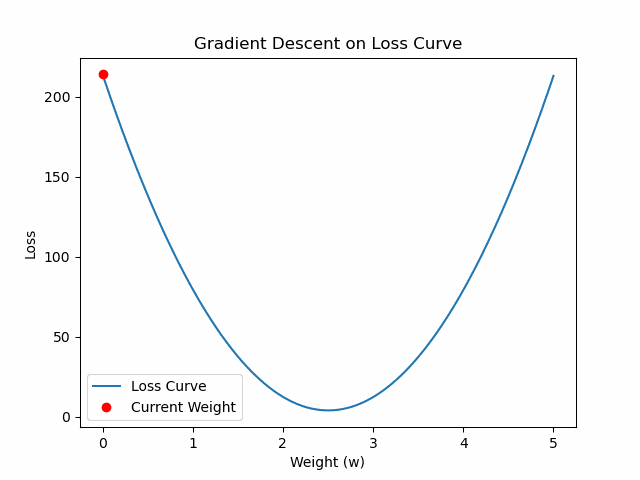

In [15]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# 1. Generate synthetic data
np.random.seed(0)
X = np.linspace(0, 10, 100)
true_w = 2.5
y = true_w * X + np.random.normal(0, 2, size=X.shape)

# 2. Define loss function
def compute_loss(w):
    y_pred = w * X
    return np.mean((y - y_pred)**2)

# 3. Precompute loss curve
w_values = np.linspace(0, 5, 200)
loss_values = [compute_loss(w) for w in w_values]

# 4. Gradient of the loss w.r.t w
def compute_gradient(w):
    y_pred = w * X
    grad = -2 * np.mean(X * (y - y_pred))
    return grad

# 5. Initialize
w_current = 0.0
learning_rate = 0.001
w_history = [w_current]
loss_history = [compute_loss(w_current)]

# 6. Simulate Gradient Descent Steps
for _ in range(100):
    grad = compute_gradient(w_current)
    w_current -= learning_rate * grad
    w_history.append(w_current)
    loss_history.append(compute_loss(w_current))

# 7. Plot setup
fig, ax = plt.subplots()
ax.plot(w_values, loss_values, label='Loss Curve')
point, = ax.plot([], [], 'ro', label='Current Weight')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Loss')
ax.set_title('Gradient Descent on Loss Curve')
ax.legend()

# 8. Animation function
def update(frame):
    point.set_data([w_history[frame]], [loss_history[frame]])
    return point,

# 9. Create animation
ani = FuncAnimation(fig, update, frames=len(w_history), interval=1000, blit=True)

# 10. Save as GIF
ani.save('gradient_descent.gif', writer=PillowWriter(fps=10))

# 11. Display saved GIF inside notebook
from IPython.display import Image
Image(filename="gradient_descent.gif")


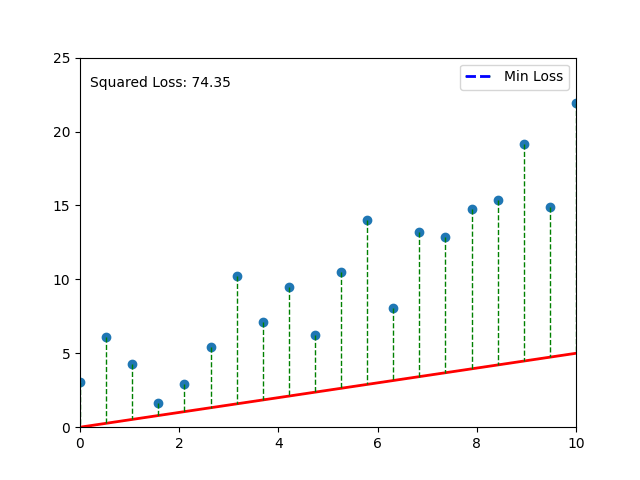

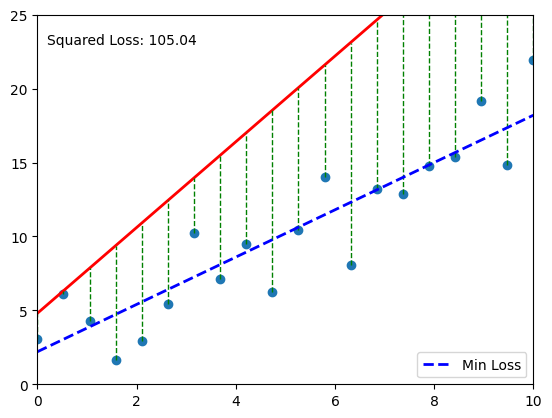

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter

# Define the true function
def true_function(x):
    return 2 * x + 1

# Generate some data points
x_data = np.linspace(0, 10, 20)
y_data = true_function(x_data) + np.random.normal(0, 2, 20)

# Define the figure and axes
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 25)

# Plot the data points
scatter = ax.scatter(x_data, y_data)

# Create an empty line object for the predicted line
line, = ax.plot([], [], 'r-', lw=2)

# Create empty line objects for the error lines
error_lines = []
for _ in range(len(x_data)):
    err_line, = ax.plot([], [], 'g--', lw=1)
    error_lines.append(err_line)

# Create a vertical line for minimum loss
min_loss_line, = ax.plot([], [], 'b--', lw=2, label='Min Loss')

# Create a text annotation for loss value
loss_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, verticalalignment='top')

# Store loss values and parameters
losses = []
slopes = []
intercepts = []

# Function to calculate squared loss
def calculate_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Function to initialize the animation
def init():
    line.set_data([], [])
    min_loss_line.set_data([], [])
    for err_line in error_lines:
        err_line.set_data([], [])
    loss_text.set_text('')
    return (line, min_loss_line, *error_lines, loss_text)

# Function to update the animation frame
def animate(i):
    # Define the predicted function with varying slope and intercept
    def predicted_function(x, slope, intercept):
        return slope * x + intercept

    # Define slope and intercept for the current frame
    slope = 0.5 + i * 0.1
    intercept = 0 + i * 0.2

    # Calculate predicted y values
    y_predicted = predicted_function(x_data, slope, intercept)

    # Calculate and store loss
    loss = calculate_loss(y_data, y_predicted)
    losses.append(loss)
    slopes.append(slope)
    intercepts.append(intercept)

    # Update the line data
    line.set_data(x_data, y_predicted)

    # Update error lines
    for j, err_line in enumerate(error_lines):
        err_line.set_data([x_data[j], x_data[j]], [y_data[j], y_predicted[j]])

    # Update minimum loss line
    if len(losses) > 0 and i == len(np.arange(25)) - 1:
        min_loss_idx = np.argmin(losses)
        min_slope = slopes[min_loss_idx]
        min_intercept = intercepts[min_loss_idx]
        y_min = predicted_function(x_data, min_slope, min_intercept)
        min_loss_line.set_data(x_data, y_min)

    # Update loss text
    loss_text.set_text(f'Squared Loss: {loss:.2f}')

    return (line, min_loss_line, *error_lines, loss_text)

# Create the animation
ani = FuncAnimation(fig, animate, frames=np.arange(25), init_func=init, interval=1000, blit=True)

# Add legend
ax.legend()

# Save as GIF
ani.save('squared_error_with_min_loss.gif', writer=PillowWriter(fps=10))

# Display saved GIF inside notebook
from IPython.display import Image
Image(filename="squared_error_with_min_loss.gif")

In [ ]:
# Your code here